In [23]:
import pandas as pd
import numpy as np

In [24]:
train = pd.read_csv('../input/train.csv',index_col=0)
test  = pd.read_csv('../input/test.csv')

In [25]:
train.isnull().sum()
print('Train Shape:', train.shape)
test.isnull().sum()
print('Test Shape:', test.shape)

Train Shape: (891, 11)
Test Shape: (418, 11)


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Data Dictionary
* **Survived: 0=NO , 1=Yes**
* **pcalss: Ticket class 1=1st , 2=2nd , 3=rd**
* **sibsp: of siblings / spouses aboard the Titanic**
* **parch: of parents / childern aboard the Titanic**
* **ticket: Titanic number**
* **cabin: Cabin number**
* **embarked: Port of Embarkation C=Cherbourg , Q=Queenstown , S=Southampton**

### Total rows and columns
 
**We can see that there are 891 rows and 12 colmns in our training dataset**

In [28]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [31]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [32]:
test.isnull().sum()
test['Survived']=''
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


## Data Visualization using Matplotlib and Seaborn packages

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Bar Chat for Categorical Features
* **pclass**
* **Sex**
* **SibSP**
* **Parch**
* **Embarked**
* **Cabin**

In [34]:
def bar_chart(feature):
    
    #calculate data -محاسبه داده
    Survived = train[train['Survived'] ==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    
    #Display numbers -نمایش اعداد
    print(f'Survived:\n{Survived}')
    print(f'Dead:\n{dead}')
    
    #Create and display chart - ایجاد و نمایش نمودار
    df = pd.DataFrame([Survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar' ,stacked=True , figsize=(10,5))
    plt.xticks(rotation=45)

Survived:
Sex
female    233
male      109
Name: count, dtype: int64
Dead:
Sex
male      468
female     81
Name: count, dtype: int64


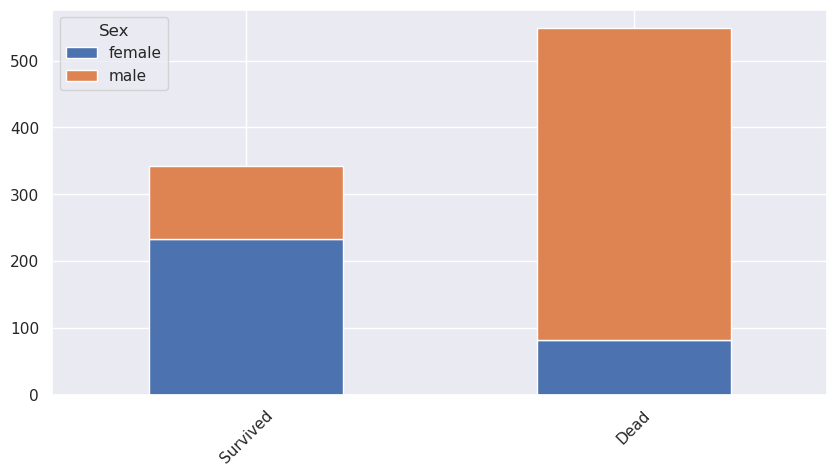

In [35]:
bar_chart('Sex')

### the chart confirms women more likely survived than men

Survived:
Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Dead:
Pclass
3    372
2     97
1     80
Name: count, dtype: int64


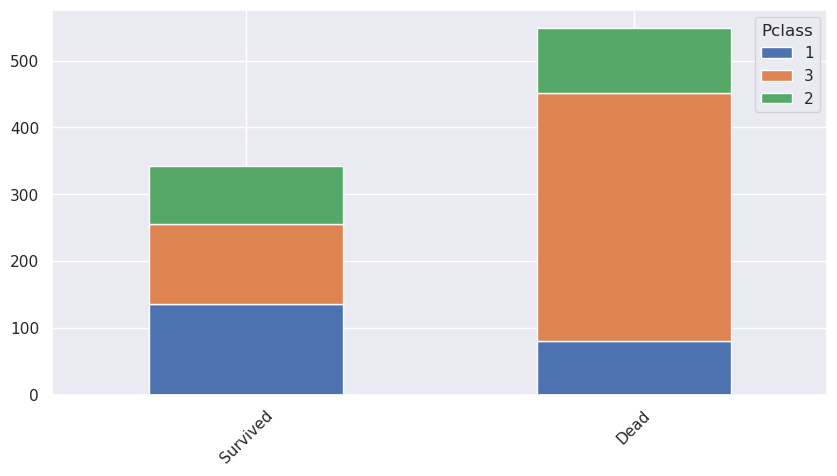

In [36]:
bar_chart('Pclass')

### the chart confirms 1st class more likely survived than othr calss 

### the chart confirms 3st class moer likely dead than othr calss

Survived:
SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
Dead:
SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64


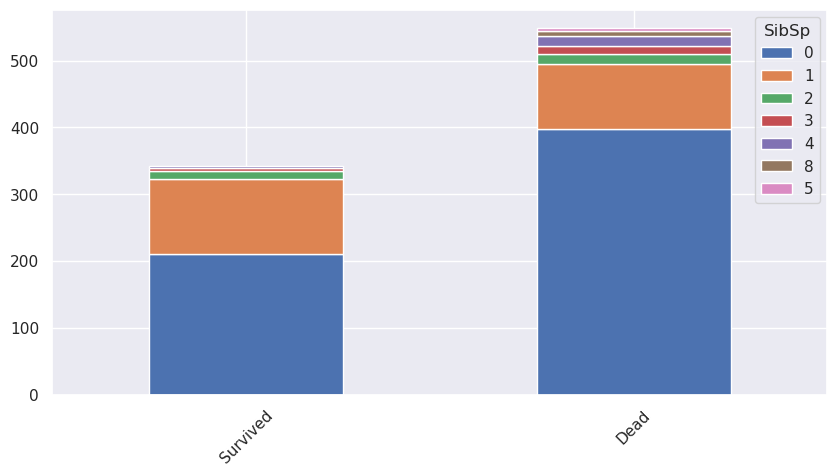

In [37]:
bar_chart('SibSp')

### the chart confirms a person aboarded with more than 2 siblings or spouse more likely survived 
### the chart confirms a person aboarded without siblings or spouse more likely dead

Survived:
Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64
Dead:
Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64


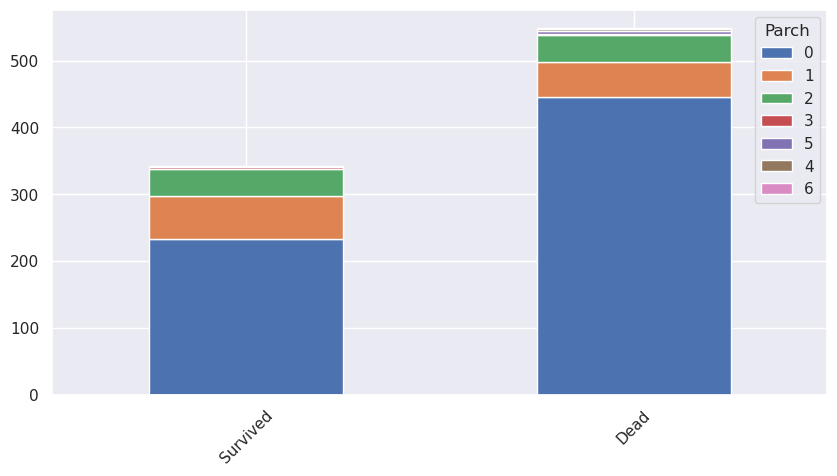

In [38]:
bar_chart('Parch')

### The chart confirms a person aboarded with more than 2 parents or children more likely survived
### The chart confirms a person aboarded alone more likely dead

Survived:
Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
Dead:
Embarked
S    427
C     75
Q     47
Name: count, dtype: int64


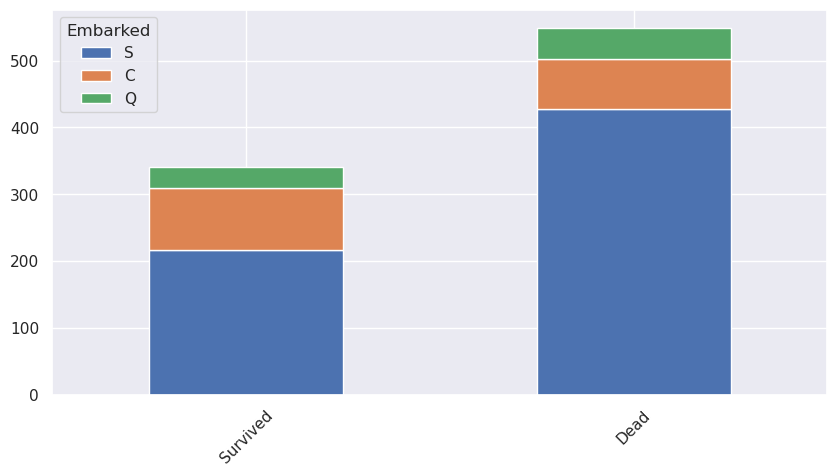

In [39]:
bar_chart('Embarked')

### The Chart confirms a person aboarded from C slightly more likely survived
### The Chart confirms a person aboarded from Q more likely dead
### The Chart confirms a person aboarded from S more likely dead